Name: Puan Abidah Nitisara  
Nim: 201401009  


---
 this model is trained with imbalanced data across classes using the DenseNet121 architecture. There are a total of 7 classes with an unequal number of data points in each class.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from glob import glob
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import warnings

from IPython.display import clear_output

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from mlxtend.plotting import plot_confusion_matrix

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [ ]:
base_dir = '/content/drive/MyDrive/skin-cancer-mnist-ham10000'

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_dir, '*', '*.jpg'))}

In [ ]:
imageid_path_dict

{'ISIC_0033304': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033304.jpg',
 'ISIC_0033294': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033294.jpg',
 'ISIC_0033363': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033363.jpg',
 'ISIC_0033373': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033373.jpg',
 'ISIC_0033356': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033356.jpg',
 'ISIC_0033387': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033387.jpg',
 'ISIC_0033364': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033364.jpg',
 'ISIC_0033355': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033355.jpg',
 'ISIC_0033357': '/content/drive/MyDrive/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0033357.jpg',
 'ISIC_003

In [ ]:
size = (120, 120)

df['path'] = df['image_id'].map(imageid_path_dict.get)
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize(size))/ 255)

In [ ]:
df = df[['dx', 'image']]

In [ ]:
df.head()

,dx,image
0,bkl,"[[[0.7411764705882353, 0.596078431372549, 0.76..."
1,bkl,"[[[0.09411764705882353, 0.050980392156862744, ..."
2,bkl,"[[[0.7333333333333333, 0.4980392156862745, 0.5..."
3,bkl,"[[[0.09411764705882353, 0.043137254901960784, ..."
4,bkl,"[[[0.5098039215686274, 0.34509803921568627, 0...."


In [ ]:
df

,dx,image
0,bkl,"[[[0.7411764705882353, 0.596078431372549, 0.76..."
1,bkl,"[[[0.09411764705882353, 0.050980392156862744, ..."
2,bkl,"[[[0.7333333333333333, 0.4980392156862745, 0.5..."
3,bkl,"[[[0.09411764705882353, 0.043137254901960784, ..."
4,bkl,"[[[0.5098039215686274, 0.34509803921568627, 0...."
...,...,...
10010,akiec,"[[[0.5294117647058824, 0.4588235294117647, 0.4..."
10011,akiec,"[[[0.0196078431372549, 0.023529411764705882, 0..."
10012,akiec,"[[[0.4235294117647059, 0.3843137254901961, 0.3..."
10013,akiec,"[[[0.615686274509804, 0.47058823529411764, 0.5..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dx      10015 non-null  object
 1   image   10015 non-null  object
dtypes: object(2)
memory usage: 156.6+ KB


In [ ]:
df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

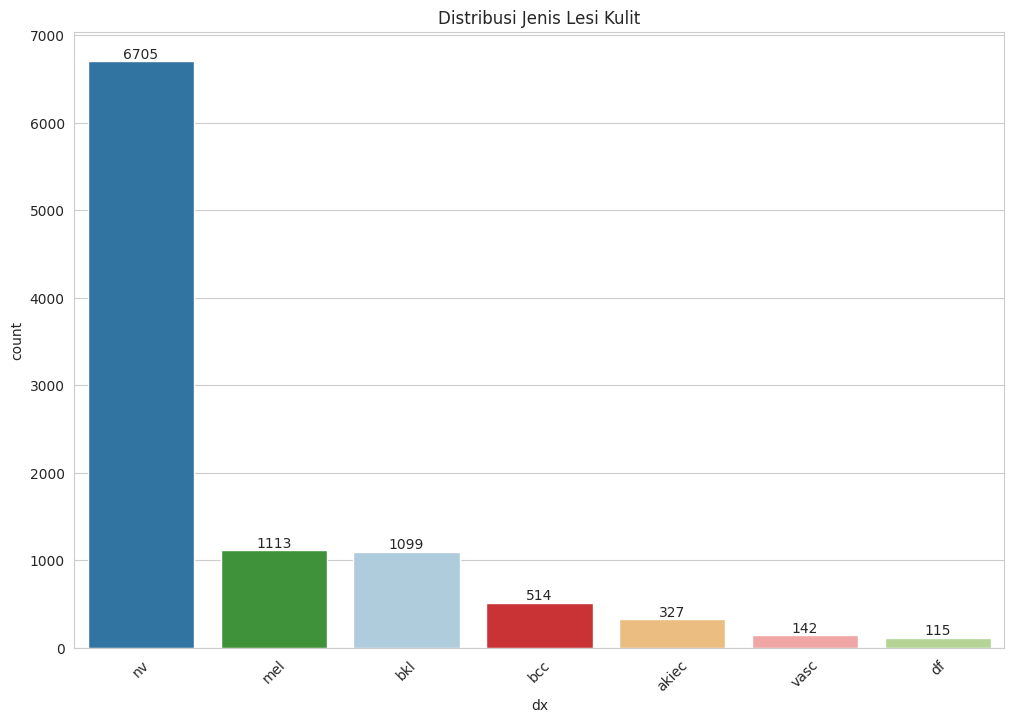

In [ ]:
# visualize the distribution of images
import seaborn as sns

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, hue='dx', palette='Paired', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribusi Jenis Lesi Kulit')
plt.xticks(rotation=45)
plt.show()

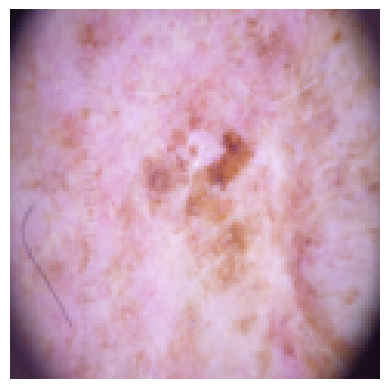

In [ ]:
arr = df.iloc[1]['image']
#Image.fromarray(arr)
plt.imshow(arr)
plt.axis('off')
plt.show()

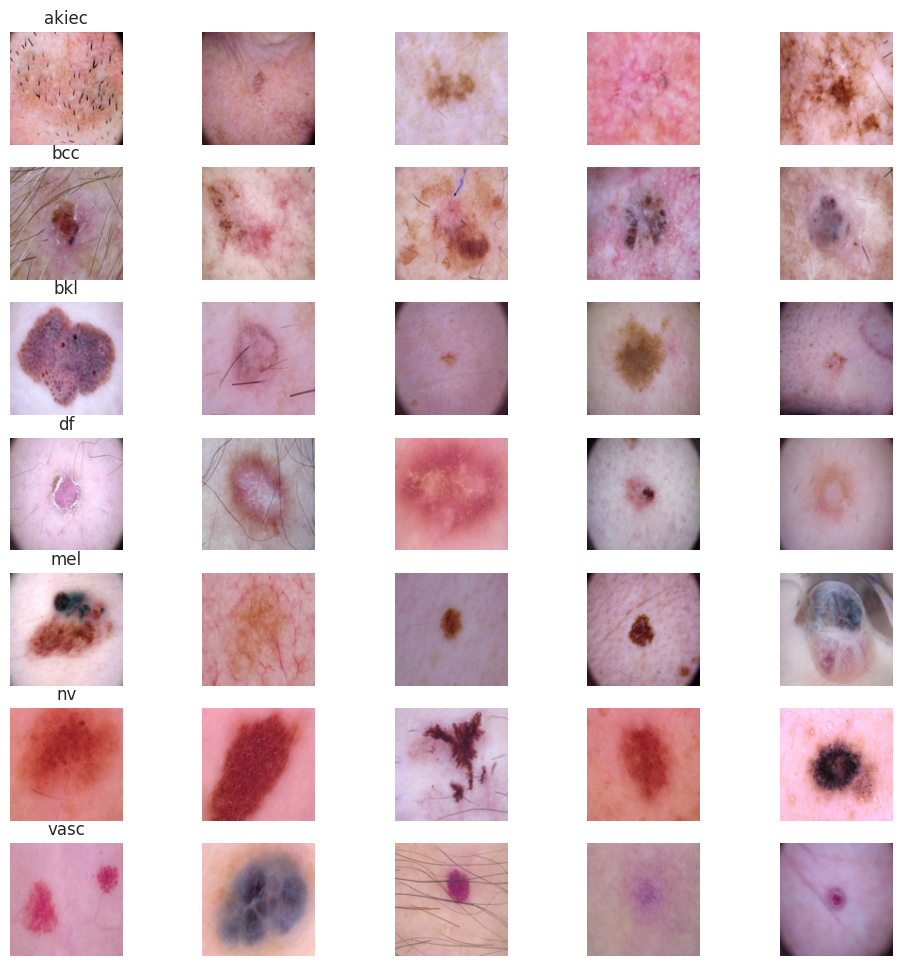

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (12,12))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=42).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
# fig.savefig('category_samples.png', dpi=300)

In [ ]:
counts = pd.DataFrame(df['dx'].value_counts()).reset_index()
counts

,dx,count
0,nv,6705
1,mel,1113
2,bkl,1099
3,bcc,514
4,akiec,327
5,vasc,142
6,df,115


In [ ]:
labelEncoder = LabelEncoder()
df['label'] = labelEncoder.fit_transform(df['dx'])

In [ ]:
df['label']

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    4
Name: label, Length: 10015, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dx      10015 non-null  object
 1   image   10015 non-null  object
 2   label   10015 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.9+ KB


In [ ]:
x = np.asarray(df['image'].to_list())
y = df['label']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=.30, random_state=42, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=.50, random_state=42, shuffle=True)

In [ ]:
print(f'x_train shape: {x_train.shape}\nx_val shape: {x_val.shape}\nx_test shape: {x_test.shape}')
print('-'*20)
print(f'y_train shape: {y_train.shape}\ny_val shape: {y_val.shape}\ny_test shape: {y_test.shape}')

x_train shape: (7010, 120, 120, 3)
x_val shape: (1502, 120, 120, 3)
x_test shape: (1503, 120, 120, 3)
--------------------
y_train shape: (7010,)
y_val shape: (1502,)
y_test shape: (1503,)


# Model

In [ ]:
# Load the pre-trained DenseNet model without top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/60
110/110 [==============================] - 16s 58ms/step - loss: 0.9533 - accuracy: 0.6939 - val_loss: 0.7449 - val_accuracy: 0.7310 - lr: 0.0010
Epoch 2/60
110/110 [==============================] - 3s 28ms/step - loss: 0.7298 - accuracy: 0.7385 - val_loss: 0.7036 - val_accuracy: 0.7377 - lr: 0.0010
Epoch 3/60
110/110 [==============================] - 3s 28ms/step - loss: 0.6603 - accuracy: 0.7619 - val_loss: 0.6936 - val_accuracy: 0.7457 - lr: 0.0010
Epoch 4/60
110/110 [==============================] - 3s 27ms/step - loss: 0.6118 - accuracy: 0.7795 - val_loss: 0.6752 - val_accuracy: 0.7443 - lr: 0.0010
Epoch 5/60
110/110 [==============================] - 3s 29ms/step - loss: 0.5866 - accuracy: 0.7864 - val_loss: 0.6719 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 6/60
110/110 [==============================] - 3s 27ms/step - loss: 0.5555 - accuracy: 0.7953 - val_loss: 0.6677 - val_accuracy: 0.7623 - lr: 0.0010
Epoch 7/60
110/110 [==============================] - 3s 26ms/s

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

47/47 [==============================] - 1s 20ms/step - loss: 0.6994 - accuracy: 0.7552
Test Accuracy: 0.7551563382148743
Test Loss: 0.6994464993476868


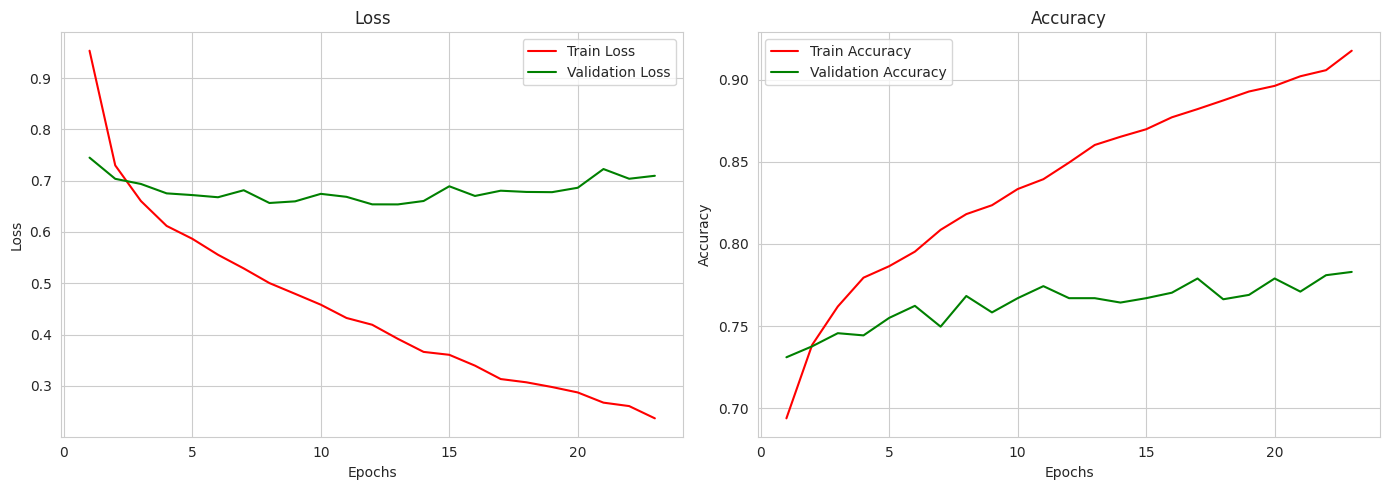

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(x_test)

47/47 [==============================] - 3s 15ms/step


In [ ]:
cm = confusion_matrix(y_test, np.argmax(predictions, axis=1))
cm

array([[ 18,   7,  14,   0,   3,   5,   0],
       [  6,  34,  15,   0,   3,  13,   0],
       [  5,   7,  99,   0,  26,  45,   0],
       [  3,   4,   3,   2,   2,   6,   0],
       [  6,   4,  24,   0,  66,  70,   1],
       [  0,  10,  43,   1,  29, 906,   1],
       [  0,   3,   0,   0,   2,   7,  10]])

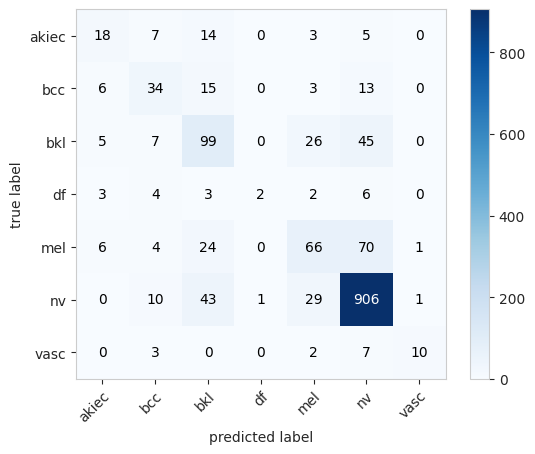

In [ ]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=cm_plot_labels, colorbar=True)
plt.show()

In [ ]:
report = classification_report(y_test, np.argmax(predictions, axis=1), target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.47      0.38      0.42        47
         bcc       0.49      0.48      0.49        71
         bkl       0.50      0.54      0.52       182
          df       0.67      0.10      0.17        20
         mel       0.50      0.39      0.44       171
          nv       0.86      0.92      0.89       990
        vasc       0.83      0.45      0.59        22

    accuracy                           0.76      1503
   macro avg       0.62      0.47      0.50      1503
weighted avg       0.74      0.76      0.74      1503



In [ ]:
# Pastikan test set sudah ada
print(f'x_test shape: {x_test.shape}\ny_test shape: {y_test.shape}')

x_test shape: (1503, 120, 120, 3)
y_test shape: (1503,)


In [ ]:
print(y_test[:10])  # Cek 10 label pertama

8947    5
3143    5
1992    4
8679    5
967     2
3937    5
8196    5
1183    3
4974    5
8840    5
Name: label, dtype: int64


In [ ]:
y_test_np = np.array(y_test)

In [ ]:
y_test_np

array([5, 5, 4, ..., 2, 5, 4])

In [ ]:
print(y_test_np[:10])

[5 5 4 5 2 5 5 3 5 5]


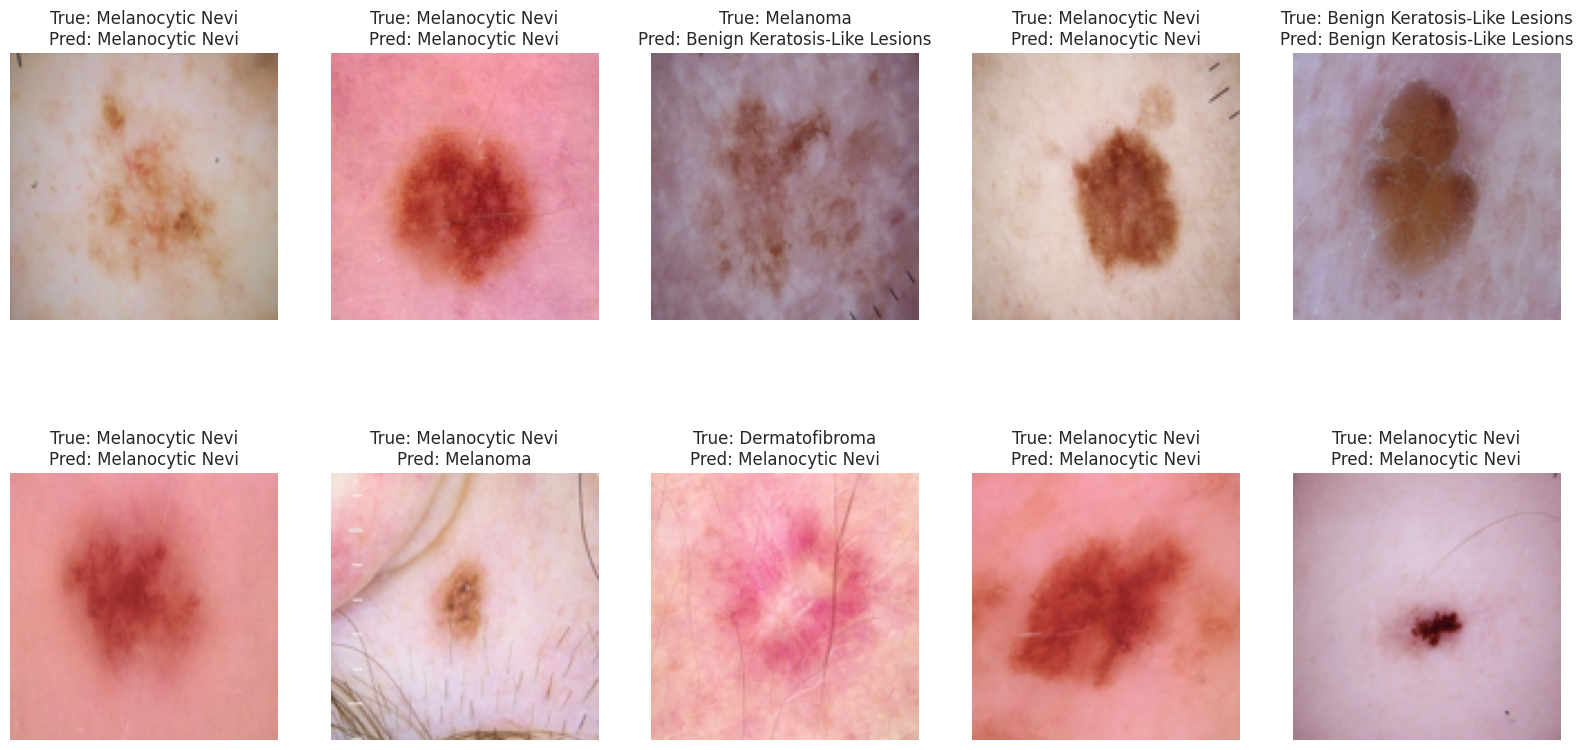

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk memplot gambar dengan label prediksi dan sebenarnya
def plot_images(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        img = images[i]
        # Pastikan nilai piksel berada dalam rentang [0, 1]
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        true_label = class_names[true_labels[i]]
        pred_label = class_names[np.argmax(pred_labels[i])]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.show()

# Daftar nama kelas (sesuaikan dengan urutan kelas di dataset Anda)
class_names = ['Actinic Keratoses', 'Basal Cell Carcinoma', 'Benign Keratosis-Like Lesions', 'Dermatofibroma', 'Melanoma', 'Melanocytic Nevi', 'Vascular Lesions']

# Plot 10 gambar pertama dari test set
plot_images(x_test, y_test_np, predictions, class_names, num_images=10)

In [ ]:
# save model
model.save('/content/drive/MyDrive/model-skin3.h5')

In [ ]:
# save model weight
model.save_weights('/content/drive/MyDrive/model-weight-skin3.h5')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Muat model yang telah disimpan
model_path = '/content/drive/MyDrive/model-skin3.h5'
model = load_model(model_path)

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, target_size=(120, 120)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalisasi gambar
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    return img_array

# List of image paths
image_paths = [
    '/content/drive/MyDrive/data-testing/actinic-keratoses.jpg',
    '/content/drive/MyDrive/data-testing/basal-cell-carcinoma.jpg',
    '/content/drive/MyDrive/data-testing/benign-keratoses-like-lesions.jpg',
    '/content/drive/MyDrive/data-testing/dermatofibroma.jpg',
    '/content/drive/MyDrive/data-testing/melanocytic-nevi.jpg',
    '/content/drive/MyDrive/data-testing/melanoma.jpg',
    '/content/drive/MyDrive/data-testing/vascular-lesions.jpg'
]

# Daftar nama kelas (sesuaikan dengan urutan kelas di dataset Anda)
class_names = ['Actinic Keratoses', 'Basal Cell Carcinoma', 'Benign Keratosis-Like Lesions', 'Dermatofibroma','Melanoma', 'Melanocytic Nevi', 'Vascular Lesions']

# Loop melalui image paths
for image_path in image_paths:
    # Muat dan preproses gambar
    img_array = load_and_preprocess_image(image_path)

    # Lakukan prediksi menggunakan model yang dimuat
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100  # Confidence dalam persentase

    # Cetak hasil prediksi
    print('Image:', image_path)
    print('Predicted class:', predicted_class)
    print('Confidence:', confidence, '%')

1/1 [==============================] - 2s 2s/step
Image: /content/drive/MyDrive/data-testing/actinic-keratoses.jpg
Predicted class: Actinic Keratoses
Confidence: 91.96158647537231 %
1/1 [==============================] - 0s 33ms/step
Image: /content/drive/MyDrive/data-testing/basal-cell-carcinoma.jpg
Predicted class: Basal Cell Carcinoma
Confidence: 96.28612399101257 %
1/1 [==============================] - 0s 32ms/step
Image: /content/drive/MyDrive/data-testing/benign-keratoses-like-lesions.jpg
Predicted class: Benign Keratosis-Like Lesions
Confidence: 99.26409125328064 %
1/1 [==============================] - 0s 31ms/step
Image: /content/drive/MyDrive/data-testing/dermatofibroma.jpg
Predicted class: Benign Keratosis-Like Lesions
Confidence: 36.82830631732941 %
1/1 [==============================] - 0s 32ms/step
Image: /content/drive/MyDrive/data-testing/melanocytic-nevi.jpg
Predicted class: Melanocytic Nevi
Confidence: 85.86453795433044 %
1/1 [==============================] - 0s 32m